<a href="https://colab.research.google.com/github/ppprakharr/RegressionModels/blob/main/CalorieBurntPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the depedencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and processing

In [2]:
cal=pd.read_csv('/content/calories.csv')
exercise = pd.read_csv('/content/exercise.csv')

In [3]:
# first 5 rows of cal
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
# first 5 rows of exercise
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# combining the two dataframe
cal_data = pd.concat([exercise, cal['Calories']],axis=1)

In [8]:
# first 5 rows of cal_data
cal_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
# checking last 5 rows
cal_data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [10]:
#checking the total datapoints
cal_data.shape

(15000, 9)

In [11]:
# gathering info about the dataset
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


replacing gender into binary

In [15]:
#counting the distribution
cal_data['Gender'].value_counts()

1    7553
0    7447
Name: Gender, dtype: int64

In [16]:
# repalcing text to binary
cal_data.replace({'Gender':{'male':0, 'female': 1}},inplace=True)

In [17]:
cal_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


Data Analysis

In [18]:
# checking the correlation
sns.set()
correlation=cal_data.corr()

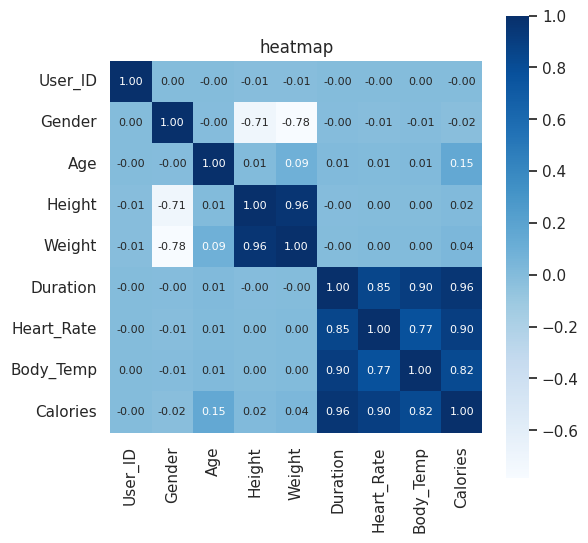

In [19]:
# making a correlation data
plt.figure(figsize=(6,6))
sns.heatmap(correlation,square=True,cbar=True,fmt='0.2f',annot=True, annot_kws={'size':8},cmap='Blues')
plt.title('heatmap')
plt.show()

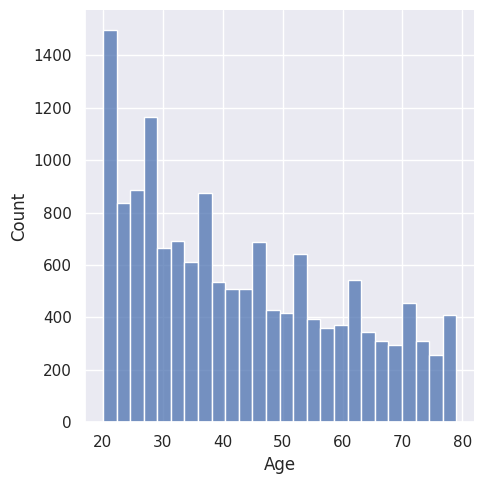

In [20]:
# age distribution
sns.displot(cal_data['Age'])

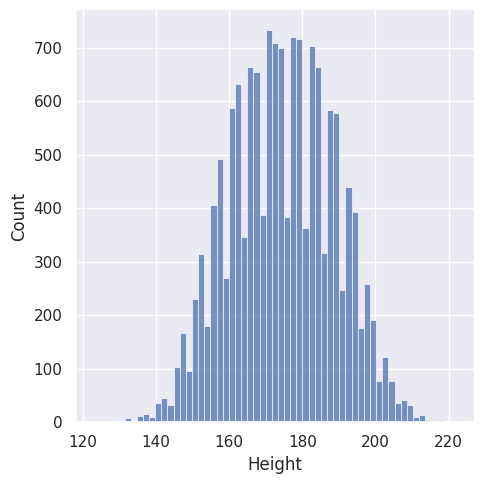

In [21]:
# height distribution
sns.displot(cal_data['Height'])

#Sepeating feature and target

In [22]:
x=cal_data.drop(columns=['User_ID', 'Calories'],axis=1)
y=cal_data['Calories']
print(x)
print(y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

Splitting into training and testing

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=4)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Training the model

XGBRegressor

In [25]:
model=XGBRegressor()

In [26]:
#training the model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
#evaluating the training data
train_check=model.predict(x_train)
r2=metrics.r2_score(train_check,y_train)
print("training r2 score: ",r2)

training r2 score:  0.9995796196569718


In [30]:
#evaluating the testing data
test_check=model.predict(x_test)
r2=metrics.r2_score(test_check,y_test)
print("testing r2 score: ",r2)

testing r2 score:  0.9988263220921945


In [31]:
# checking mean absolute
mea=metrics.mean_absolute_error(y_test,test_check)
print('mean absolute error: ',mea)

mean absolute error:  1.4258747485925753


#Making a predictive system

In [34]:
input = (0,	78,	193.0,	97.0,	2.0,	84.0,	38.3)
input_np = np.asarray(input)
input_reshape = input_np.reshape(1,-1)
result=model.predict(input_reshape)
print('result: ',result[0])

result:  10.819238
